In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [37]:
import cv2
import numpy as np
import tensorflow as tf

# Paths to the two images
image_path1 = "C:\\Users\\rkkab\\Downloads\\file.jpg"
image_path2 = "C:\\Users\\rkkab\\DBMS\\WhatsApp Image 2024-12-27 at 15.04.45_4aa526b1.jpg"

# Load and preprocess an image
def preprocess_image(image_path, target_size=(224, 224)):
    # Read the image
    image = cv2.imread(image_path)
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize to target size
    image = cv2.resize(image, target_size)
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    # Add batch dimension (1, height, width, channels)
    image = np.expand_dims(image, axis=0)
    return image

# Preprocess the two images
image1 = preprocess_image(image_path1)
image2 = preprocess_image(image_path2)

# Combine images into a batch (optional)
images_batch = np.vstack([image1, image2])

# Display the shape of the batch
print(f"Shape of preprocessed images batch: {images_batch.shape}")


Shape of preprocessed images batch: (2, 224, 224, 3)


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,         # Rotate images up to 20 degrees
    width_shift_range=0.2,     # Shift images horizontally up to 20% of the width
    height_shift_range=0.2,    # Shift images vertically up to 20% of the height
    horizontal_flip=True,      # Randomly flip images horizontally
    zoom_range=0.2             # Random zoom on images
)

# Fit the generator on your image batch
datagen.fit(images_batch)


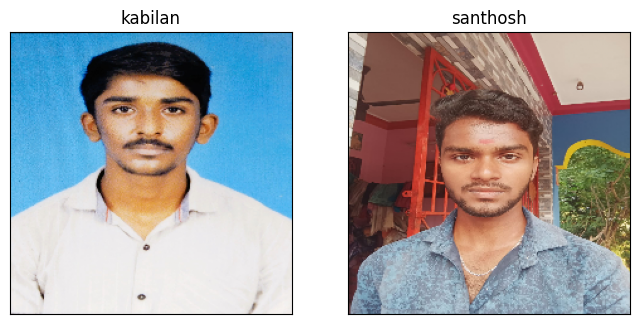

In [39]:
class_names=['kabilan','santhosh']
plt.figure(figsize=(8,7))
for i in range(2):
    plt.subplot(1,2,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images_batch[i])  # Display the image
    plt.title(class_names[i])  
plt.show()

In [40]:
# Use augmented data for training
augmented_train_generator = datagen.flow(images_batch, class_names, batch_size=2)

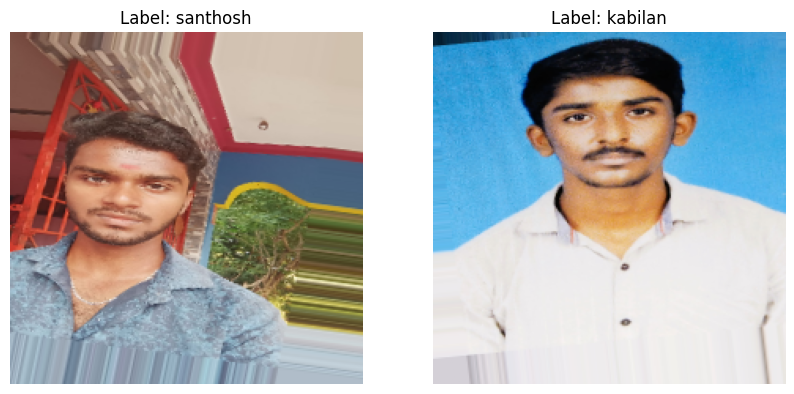

In [41]:
import matplotlib.pyplot as plt

# Generate some augmented images
augmented_images, augmented_labels = next(augmented_train_generator)

plt.figure(figsize=(10, 10))
for i in range(len(augmented_images)):  # Display 4 augmented images
    plt.subplot(1, len(augmented_images), i + 1)
    plt.imshow(augmented_images[i])  # Display augmented image
    plt.title(f"Label: {augmented_labels[i]}")
    plt.axis('off')
plt.show()


In [69]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [70]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 26, 26, 128)     

In [71]:
# Numeric labels for training
# Create a mapping from names to numeric labels
label_map = {'kabilan': 0, 'santhosh': 1}

# Convert string labels to numeric for training and validation
numeric_labels = np.array([label_map[label] for label in class_names])
test_label = np.array([label_map['kabilan']])  # Example test label

augmented_train_generator = datagen.flow(
    images_batch, 
    numeric_labels, 
    batch_size=2
)

test_img="C:\\Users\\rkkab\Downloads\\Firefly 20240628142934.png"
# Preprocess the test image
test_image = preprocess_image(test_img)
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)
class_weight = {0: 1.0, 1: 2.0}  # Adjust weights based on class distribution
history=model.fit(augmented_train_generator, epochs=8, validation_data=(test_image, test_label), class_weight=class_weight)




Epoch 1/8
1/1 [==============================] - 6s 6s/step - loss: 1.0557 - accuracy: 0.5000 - val_loss: 11.0976 - val_accuracy: 0.0000e+00
Epoch 2/8
1/1 [==============================] - 2s 2s/step - loss: 6.2352 - accuracy: 0.5000 - val_loss: 0.2410 - val_accuracy: 1.0000
Epoch 3/8
1/1 [==============================] - 2s 2s/step - loss: 1.6275 - accuracy: 0.5000 - val_loss: 0.6487 - val_accuracy: 1.0000
Epoch 4/8
1/1 [==============================] - 1s 1s/step - loss: 1.0042 - accuracy: 0.5000 - val_loss: 1.0393 - val_accuracy: 0.0000e+00
Epoch 5/8
1/1 [==============================] - 1s 1s/step - loss: 0.7490 - accuracy: 0.5000 - val_loss: 1.1757 - val_accuracy: 0.0000e+00
Epoch 6/8
1/1 [==============================] - 1s 1s/step - loss: 0.5756 - accuracy: 1.0000 - val_loss: 1.5760 - val_accuracy: 0.0000e+00
Epoch 7/8
1/1 [==============================] - 2s 2s/step - loss: 0.2695 - accuracy: 1.0000 - val_loss: 4.1268 - val_accuracy: 0.0000e+00
Epoch 8/8
1/1 [============

In [72]:
print(numeric_labels)  # Check numeric label values
print(test_label)      # Verify test labels


[0 1]
[0]


In [73]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 26, 26, 128)     

1/1 - 0s - loss: 6.6894 - accuracy: 0.0000e+00 - 119ms/epoch - 119ms/step


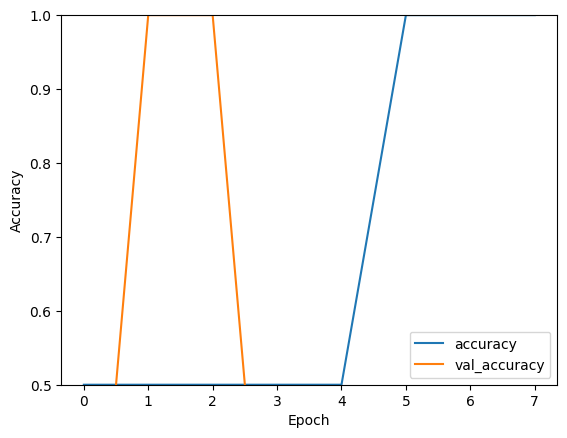

In [74]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)

In [ ]:
git add path/to/your/file